<a href="https://www.kaggle.com/code/yuriipolulikh/digit-recognition-99-4-accuracy?scriptVersionId=195790513" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# **Import Libraries**

In [1]:
import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.utils import to_categorical

# **Import Data**

In [2]:
df = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')

In [3]:
df_test = pd.read_csv('/kaggle/input/digit-recognizer/test.csv')

In [4]:
labels = df['label'].values.reshape(-1,1) 
labels[:5]

array([[1],
       [0],
       [1],
       [4],
       [0]])

In [5]:
df.drop('label',axis = 1,inplace = True)

# **EDA**

In [6]:
df.shape

(42000, 784)

In [7]:
df_test.shape

(28000, 784)

In [8]:
df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
def reshape_row(row):
    return row[:].reshape(28, 28)


train_reshaped_matrices = np.array([reshape_row(row) for row in df.values])
test_reshaped_matrices  = np.array([reshape_row(row) for row in df_test.values])

In [10]:
print(train_reshaped_matrices.shape)
print(test_reshaped_matrices.shape)

(42000, 28, 28)
(28000, 28, 28)


In [11]:
train_reshaped_matrices = np.expand_dims(train_reshaped_matrices,axis = -1)
test_reshaped_matrices = np.expand_dims(test_reshaped_matrices,axis = -1)

In [12]:
print(train_reshaped_matrices.shape)
print(test_reshaped_matrices.shape)

(42000, 28, 28, 1)
(28000, 28, 28, 1)


In [13]:
# Normalize 
train_reshaped_matrices = train_reshaped_matrices.astype('float32') / 255.0
test_reshaped_matrices = test_reshaped_matrices.astype('float32') / 255.0

# **Images**

In [14]:
def plot_images_randomly():
    plt.figure(figsize = (12,4))
    for i in range(10):
        plt.subplot(2,5,i + 1)
        random_idx = np.random.randint(low = 0,high=df.shape[0])
        plt.title(labels[random_idx][0],fontsize = 14)
        plt.imshow(train_reshaped_matrices[random_idx])
        plt.axis('off')
    plt.show()

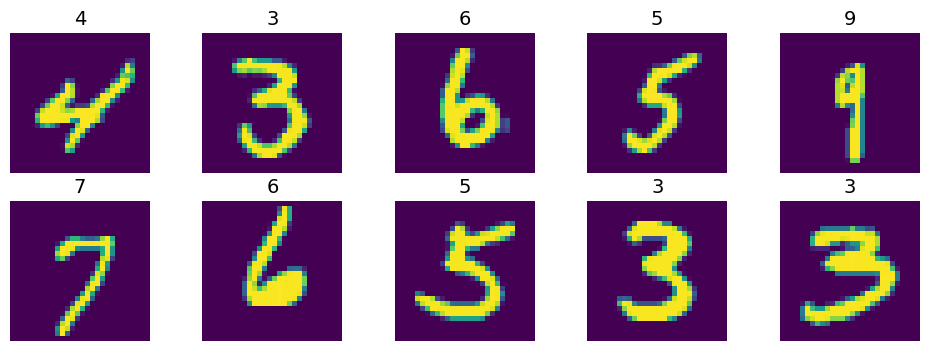

In [15]:
plot_images_randomly()

# **Split Data**

In [16]:
X_train, X_test, y_train, y_test = train_test_split(train_reshaped_matrices,labels,test_size = 0.2,random_state = 41)

In [17]:
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# **Model Implementation**
For this task I've decided to use LeNet architecrture

In [18]:
model = tf.keras.Sequential([
        Conv2D(filters=32, kernel_size=(5,5), padding='same', activation='relu', input_shape=(28, 28, 1)),
        BatchNormalization(),
        MaxPool2D(strides=2),
        Dropout(0.25),

        Conv2D(filters=64, kernel_size=(5,5), padding='valid', activation='relu'),
        BatchNormalization(),
        MaxPool2D(strides=2),
        Dropout(0.25),

        Flatten(),
        Dense(256, activation='relu'),
        BatchNormalization(),
        Dropout(0.5),

        Dense(84, activation='relu'),
        BatchNormalization(),
        Dropout(0.5),

        Dense(10, activation='softmax')
])

model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=tf.keras.optimizers.Adam(learning_rate=0.001))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# **Define Callbacks**

In [19]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)
callbacks = [early_stopping, reduce_lr]

# **Training the model**

In [20]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test), callbacks=callbacks)

Epoch 1/30


I0000 00:00:1725786785.831246      98 service.cc:145] XLA service 0x7ccaa8009e30 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1725786785.831311      98 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0


  52/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3188 - loss: 2.3130 

I0000 00:00:1725786794.326954      98 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1050/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 4ms/step - accuracy: 0.7828 - loss: 0.7181 - val_accuracy: 0.9805 - val_loss: 0.0635 - learning_rate: 0.0010
Epoch 2/30
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9591 - loss: 0.1394 - val_accuracy: 0.9850 - val_loss: 0.0485 - learning_rate: 0.0010
Epoch 3/30
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9701 - loss: 0.0978 - val_accuracy: 0.9818 - val_loss: 0.0583 - learning_rate: 0.0010
Epoch 4/30
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9736 - loss: 0.0896 - val_accuracy: 0.9856 - val_loss: 0.0461 - learning_rate: 0.0010
Epoch 5/30
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9790 - loss: 0.0738 - val_accuracy: 0.9889 - val_loss: 0.0379 - learning_rate: 0.0010
Epoch 6/30
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9812 - loss: 0.0668 - val_accuracy: 0.9895 - val_loss: 0.0351 - learning_rate: 0.0010
Epoch 7/30
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9830 - loss: 0.058

# **Make Predictons**

In [21]:
predictions = model.predict(test_reshaped_matrices).argmax(axis=1)
predictions

875/875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


array([2, 0, 9, ..., 3, 9, 2])

# **Analyze the Predictions**

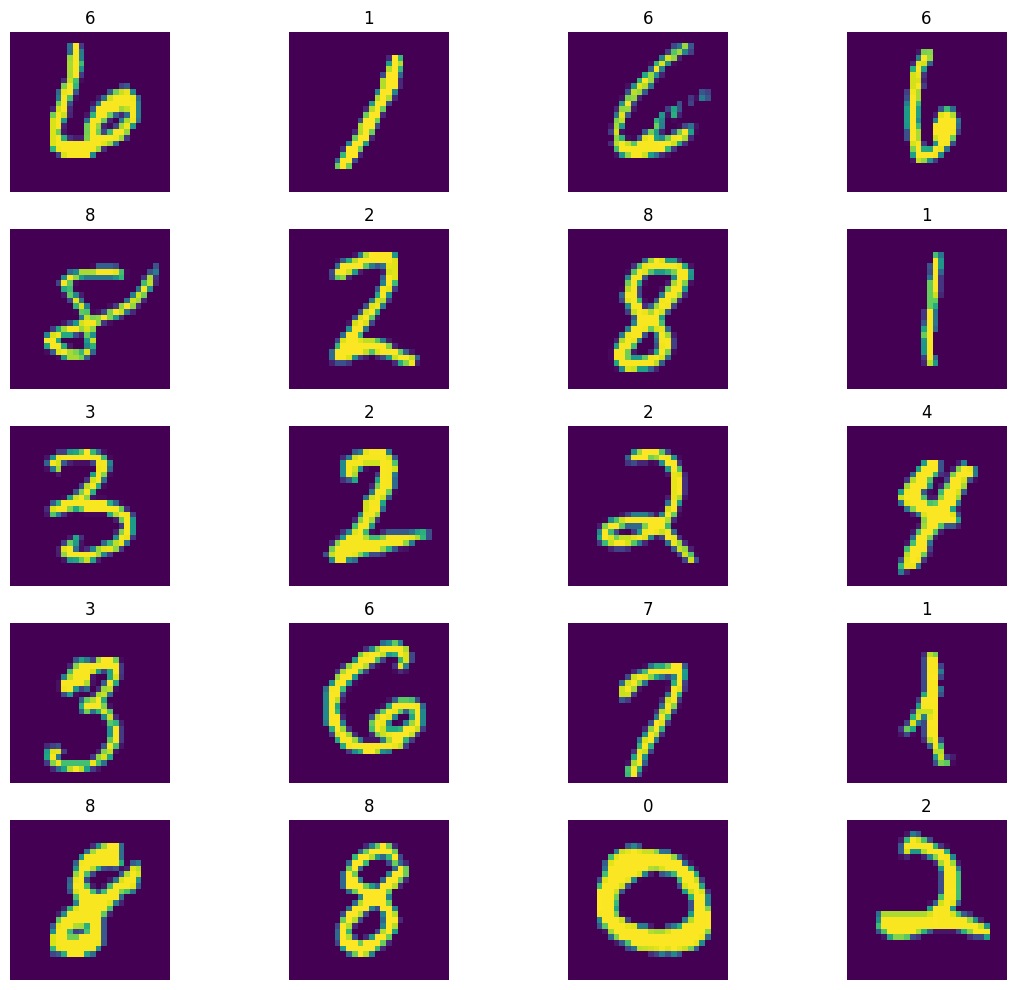

In [22]:
def plot_predicted():
    """
    Randomly Prints Images with their Predicted Labels
    """
    plt.figure(figsize=(12, 10))
    for i in range(20):
        random_idx = np.random.randint(low=0, high=test_reshaped_matrices.shape[0])
        
        plt.subplot(5, 4, i + 1)
        plt.imshow(test_reshaped_matrices[random_idx])
        plt.axis('off')        
        plt.title(predictions[random_idx])
    
    plt.tight_layout()
    plt.show()

plot_predicted()

263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


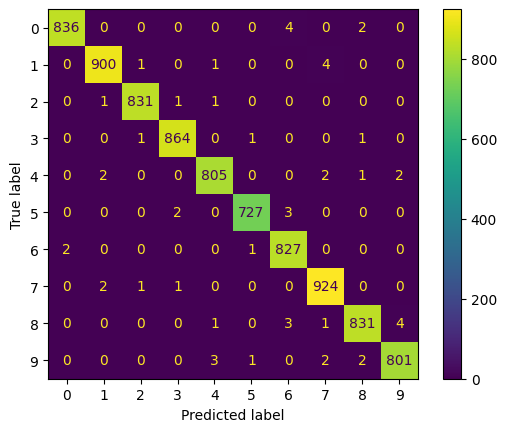

In [23]:
conf_matrix = confusion_matrix(y_test.argmax(axis=1),model.predict(X_test).argmax(axis=1))

ConfusionMatrixDisplay(conf_matrix).plot()
plt.show()

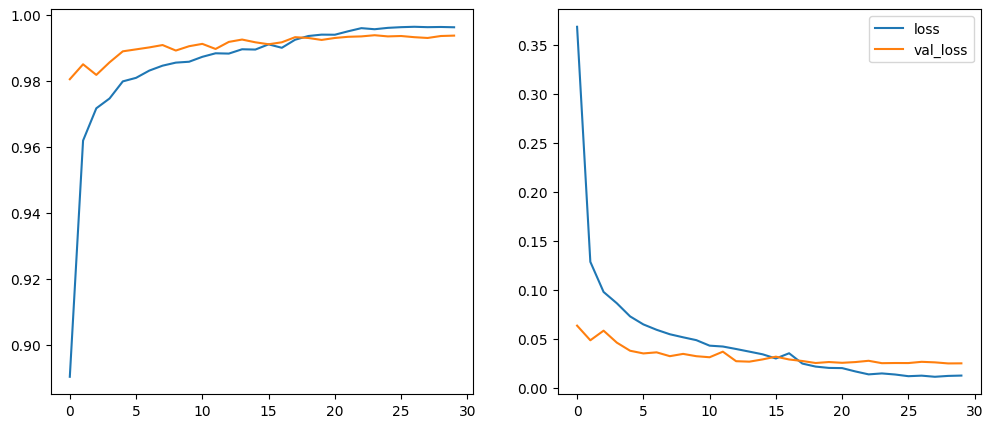

In [24]:
epochs = history.epoch

plt.figure(figsize = (12,5))
for i,metric in enumerate(list(history.history.keys())[:-1]):
    plt.subplot(1,2,i%2+1)
    plt.plot(epochs,history.history[metric],label = metric)
plt.legend()
plt.show()

# **Submission File**

In [25]:
pd.read_csv('/kaggle/input/digit-recognizer/sample_submission.csv')

,ImageId,Label
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
27995,27996,0
27996,27997,0
27997,27998,0
27998,27999,0


In [26]:
submission = pd.DataFrame({'ImageId': range(1,len(test_reshaped_matrices)+1), 'Label': predictions})
submission.to_csv('submission.csv',index = False)

# **Conclusion**
We've implemented model with LeNet architecture and reach **99.4%** accuracy! Its simplicity makes it ideal for small-scale image classification tasks such as Handwritten Digit Recongnition.